### Importing all the libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

### Loading the dataset: 

In [2]:
data1 =pd.read_csv(r'E:\Data Science Internship\Coding Raja\Sentiment Analysis\Russia Vs Ukraine Dataset.csv')

In [3]:
data1.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.546680e+18,1.546640e+18,2022-07-12 02:14:37 UTC,12-07-2022,02:14:37,0,8.032270e+08,mutex7,David Gondek,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'notausername12', 'name': 'no...",NaN,NaN,NaN,NaN
1,1.546680e+18,1.546670e+18,2022-07-12 02:14:30 UTC,12-07-2022,02:14:30,0,1.021470e+18,timcrow68661485,Tim Crowley,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MarkHertling', 'name': 'Mark...",NaN,NaN,NaN,NaN
2,1.546680e+18,1.546660e+18,2022-07-12 02:14:29 UTC,12-07-2022,02:14:29,0,5.801442e+08,la_kings_67,Chuck Leek,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'propornot', 'name': 'PropOrN...",NaN,NaN,NaN,NaN
3,1.546680e+18,1.546680e+18,2022-07-12 02:14:28 UTC,12-07-2022,02:14:28,0,1.025760e+18,ottenbergeve,Eve Ottenberg,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1.546680e+18,1.546680e+18,2022-07-12 02:14:26 UTC,12-07-2022,02:14:26,0,1.469390e+18,ds_1911,Restoring Our Republic ❤️🇺🇸,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [4]:
data1.shape

(10016, 36)

In [5]:
data1.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [6]:
data1.dtypes

id                 float64
conversation_id    float64
created_at          object
date                object
time                object
timezone             int64
user_id            float64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [7]:
data1= data1[["username","tweet","language"]]

# Only considering usernames, tweets, and languages

In [8]:
data1.head()

,username,tweet,language
0,mutex7,@notausername12 And what happens the day after...,en
1,timcrow68661485,@MarkHertling Serious question and I fully do ...,en
2,la_kings_67,@propornot @anonbergine That's a GERMAN story....,en
3,ottenbergeve,Europe never learns. As it shivers in fear tha...,en
4,ds_1911,Keep blaming Russia,en


### Checking for any missing values:

In [9]:
data1.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [10]:
data1["language"].value_counts()

language
en     8856
pt      610
it      148
qme      66
in       58
es       42
und      41
ru       33
ca       19
ja       17
vi       16
zh       16
qht      10
fi        8
fr        8
tl        6
pl        5
qam       5
hi        5
ko        5
ro        4
zxx       4
de        4
tr        3
ur        3
sv        3
th        3
nl        3
cs        3
ht        3
ar        2
da        1
si        1
uk        1
fa        1
ta        1
no        1
am        1
Name: count, dtype: int64

**Majority of the tweets are in English.**

### Preparing this data for the sentiment analysis:

In [13]:
# removing all the links, punctuation, symbols and other language errors from the tweets.

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dasra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data1["tweet"] = data1["tweet"].apply(clean)

**Now, looking at the wordcloud of the tweets which will show us the most frequently used words in the tweets by people:**

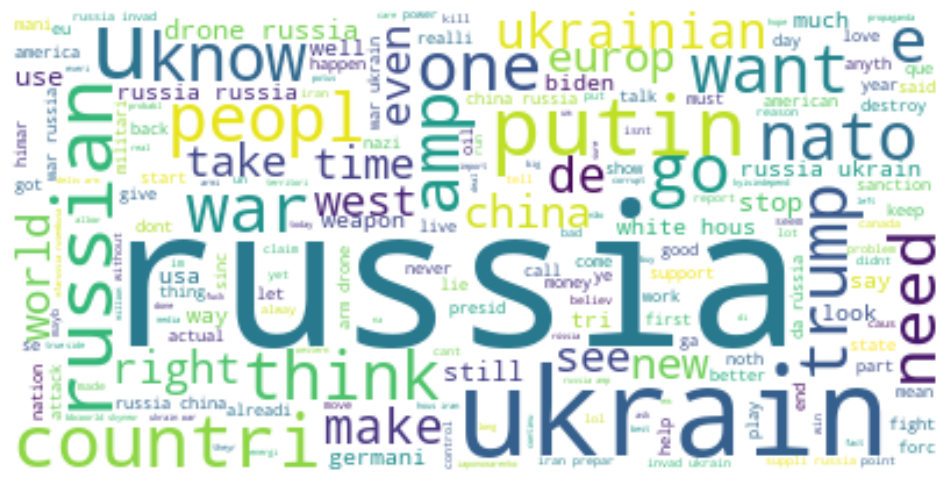

In [32]:
text = " ".join(i for i in data1.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Adding three more columns in this dataset as Positive, Negative, and Neutral through sentiment scores of the tweets:**

In [23]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data1["tweet"]]
data1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data1["tweet"]]
data1["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data1["tweet"]]
data1 = data1[["tweet", "Positive", "Negative", "Neutral"]]
print(data1.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dasra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0   happen day exhaust end russia isnt go anywher...     0.000     0.187   
1  markhertl serious question fulli expect repli ...     0.000     0.051   
2  propornot anonbergin that german stori reflect...     0.061     0.000   
3  europ never learn shiver fear russia may shut ...     0.122     0.181   
4                                  keep blame russia     0.000     0.545   

   Neutral  
0    0.813  
1    0.949  
2    0.939  
3    0.697  
4    0.455  


**Most frequent words used by people with positive sentiments:**

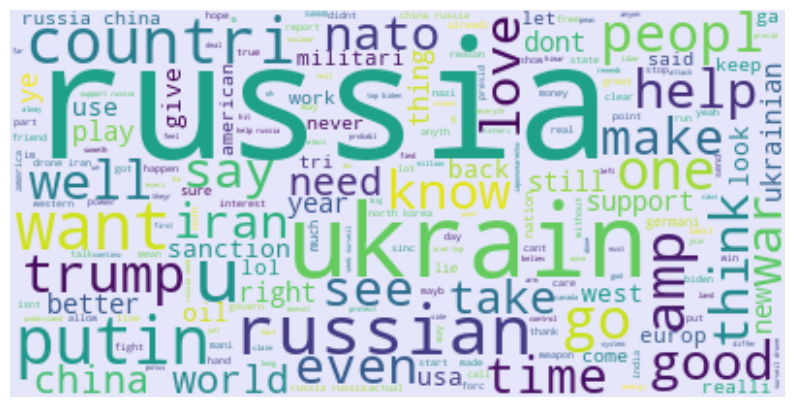

In [35]:
positive =' '.join([i for i in data1['tweet'][data1['Positive'] > data1["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="lavender").generate(positive)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Most frequent words used by people with negative sentiments:**

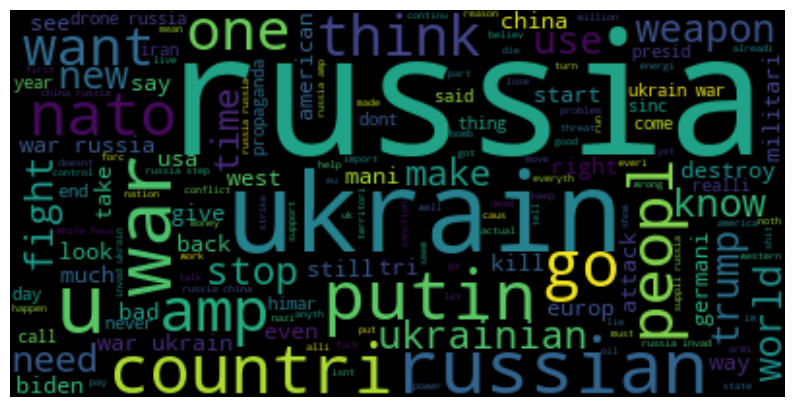

In [39]:
negative =' '.join([i for i in data1['tweet'][data1['Negative'] > data1["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(negative)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()